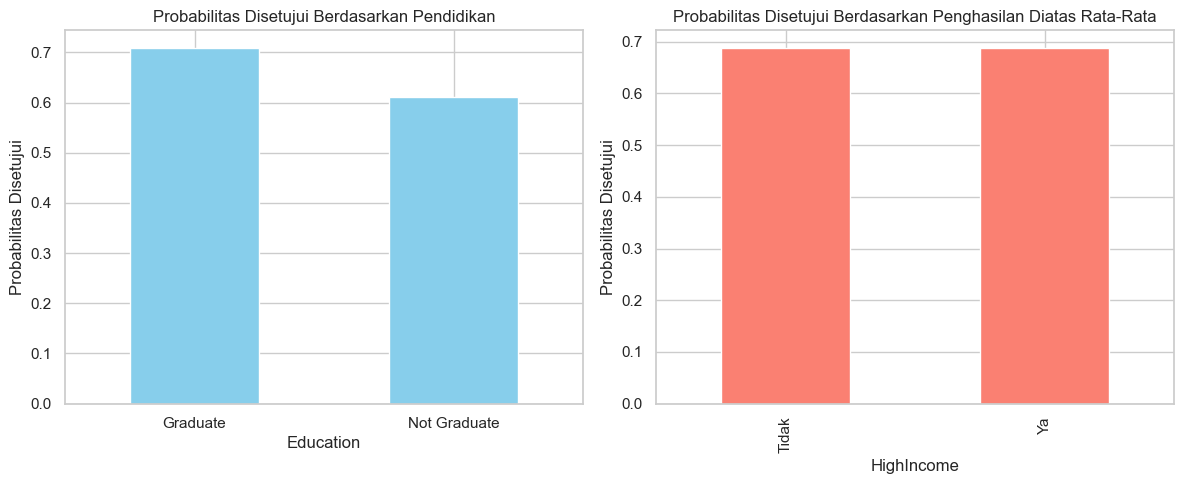

Probabilitas berdasarkan Pendidikan:
Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940

Probabilitas berdasarkan Penghasilan Diatas Rata-Rata:
Loan_Status         N         Y
HighIncome                     
False        0.312785  0.687215
True         0.312500  0.687500


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("dataset nomor 2.xlsx")

rata_rata_penghasilan = df["ApplicantIncome"].mean()
df["HighIncome"] = df["ApplicantIncome"] > rata_rata_penghasilan

df_clean = df.dropna(subset=["Education", "ApplicantIncome", "Loan_Status"])

prob_edu = df_clean.groupby("Education")["Loan_Status"].value_counts(normalize=True).unstack()

prob_income = df_clean.groupby("HighIncome")["Loan_Status"].value_counts(normalize=True).unstack()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# Grafik 1: Pendidikan
plt.subplot(1, 2, 1)
prob_edu["Y"].plot(kind="bar", color="skyblue")
plt.title("Probabilitas Disetujui Berdasarkan Pendidikan")
plt.ylabel("Probabilitas Disetujui")
plt.xticks(rotation=0)

# Grafik 2: Penghasilan
plt.subplot(1, 2, 2)
prob_income["Y"].plot(kind="bar", color="salmon")
plt.title("N=Tidak Dietujui, Y=Disetujui")
plt.title("Probabilitas Disetujui Berdasarkan Penghasilan Diatas Rata-Rata")
plt.xticks([0, 1], ["Tidak", "Ya"])
plt.ylabel("Probabilitas Disetujui")

plt.tight_layout()
plt.show()

print("Probabilitas berdasarkan Pendidikan:")
print(prob_edu)
print("\nProbabilitas berdasarkan Penghasilan Diatas Rata-Rata:")
print(prob_income)